In [93]:
import numpy as np
import matplotlib.pyplot as plt
from spacepy import pycdf
import datetime
import math

## Observations

In [94]:
#reading cdf file in downloaded from cdaweb, WIND/3DP stallite data
filename=('wi_sfsps_3dp_20020414222510_20020414234958.cdf')
cdf = pycdf.CDF(filename)
energies=cdf['ENERGY'][1]

#Reading the date of the observation
year=cdf['Epoch'][1].year
month=cdf['Epoch'][1].month
day=cdf['Epoch'][1].day

#Setting the approximate time of injection
hour=22
minute=25

In [95]:
#Calculating the velocity and time travelled from the energies of the electrons

#Setting some constants
erest_energy=511000 # rest energy of an electron in eV
c=3*(10**8) #light speed
L_0=1.5*(10**11) #sun-earth distance in m

#Relativistic calculation:
gamma=np.zeros(len(energies))
v_rel=np.zeros(len(energies))
t_rel=np.zeros(len(energies))
for i in range(len(energies)):
    gamma[i]=energies[i]/erest_energy+1 #calculating the Lorentz factor
    v_rel[i]=c*np.sqrt(1-1/(np.square(gamma[i]))) #calculating the velocity corresponding to each energy
    t_rel[i]=(L_0/v_rel[i])/60 #calculating the time travelled by the electron in minute
print(v_rel)

[9.38363422e+07 1.12391239e+08 1.39477003e+08 1.69567237e+08
 2.02569652e+08 2.34718099e+08 2.60296441e+08]


In [96]:
#A bit overcomplicated calculation of arrival time for the case of free propagation

x=datetime.datetime(year,month,day,hour,minute) #setting the time when the electrons started from the Sun
hourofarr=np.zeros(len(energies))
minofarr=np.zeros(len(energies))
for i in range(len(energies)):
    arr_min=t_rel[i]+x.minute
    if arr_min > 60: #if the electron travels for more than an hour
        hourofarr[i]=int(arr_min/60)+ x.hour #add 1 to the hour value
        minofarr[i]=arr_min-(hourofarr[i]-x.hour)*60 #get the minutes above 1 hour
    else:
        hourofarr[i]=0+x.hour #otherwise leave the hour value
        minofarr[i]=arr_min
    #printing the arrival times for each energy level
    hourofarrstr = str(int(hourofarr[i]))
    minofarrstr = str(math.ceil(minofarr[i]))
    print('The time of arrival is '+ hourofarrstr + ':' + minofarrstr + ' for electrons with energies of '+ str(energies[i]) +' eV')

The time of arrival is 22:52 for electrons with energies of 26994.957 eV
The time of arrival is 22:48 for electrons with energies of 40138.668 eV
The time of arrival is 22:43 for electrons with energies of 66172.26 eV
The time of arrival is 22:40 for electrons with energies of 108440.95 eV
The time of arrival is 22:38 for electrons with energies of 181782.48 eV
The time of arrival is 22:36 for electrons with energies of 309508.94 eV
The time of arrival is 22:35 for electrons with energies of 516823.4 eV


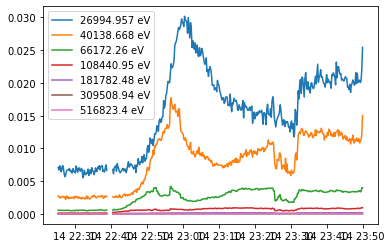

In [98]:
#Plotting the time series

for i in range(len(energies)):
    plt.plot(cdf['Epoch'],cdf['FLUX'][:,i], label=str(energies[i])+' eV')
plt.legend()

## Model

In [87]:
#calculation of the diffusion coefficient for the observed energy channels
#take a first approximation mfp
mfp=10**(-8) #an initial value for the mean free path
D=np.zeros(len(energies))
for i in range(len(energies)):
    D[i]=(mfp*v_rel[i])/3 #spatial diffusion coefficient
print(D)

[0.31278781 0.37463746 0.46492334 0.56522412 0.67523217 0.78239366
 0.8676548 ]


Text(0, 0.5, 'F(x,t)')

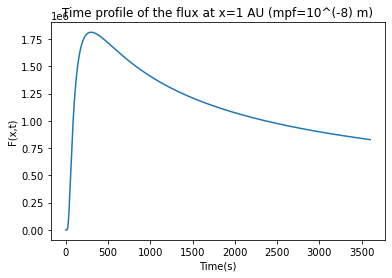

In [103]:
x=15 # 1 AU
t=np.arange(1,3600) #time passed since injection
n_0=1 #setting the initial number density to be 1, this could be anything
n=np.zeros((len(t),len(energies))) #the rows are various times, the columns are various energies
F=np.zeros((len(t),len(energies)))
for i in range(len(energies)):
    n[:,i]=np.sqrt(1/(4*np.pi*D[i]*t))*n_0*np.exp(-(np.square(x)/(4*D[i]*t))) #the number density
    F[:,i]=v_rel[i]*n[:,i] #the number flux
plt.plot(t,F[:,1])
#plt.plot(np.arange(len(cdf['Epoch'])),cdf['FLUX'][:,1]) #comparing the observations to the analytical solution
plt.title('Time profile of the flux at x=1 AU (mpf=10^(-8) m)')
plt.xlabel('Time(s)')
plt.ylabel('F(x,t)')

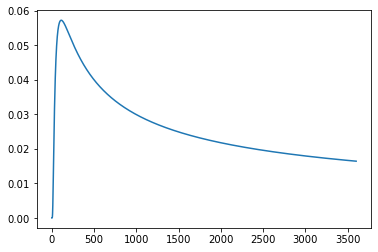

In [38]:
#trying the solution for some of the constants removed
n_trial=np.sqrt(1/t)*np.exp(-(np.square(x)/(4*t)))
plt.plot(t,n_trial)